In [1]:
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data manipulation
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# preset data
from sklearn.datasets import load_breast_cancer

# Naïve Bayesian
hw 3

## Cancer Data Setup

In [2]:
dataset = load_breast_cancer()

In [3]:
cancer_data = dataset.data
cancer_data.shape

(569, 30)

In [4]:
cancer_labels = dataset.target
cancer_labels = np.reshape(cancer_labels,(len(cancer_labels),1))
cancer_labels.shape

(569, 1)

In [5]:
cancer_data = np.concatenate([cancer_data,cancer_labels],axis=1)
cancer_data.shape

(569, 31)

In [6]:
cancer_df = pd.DataFrame(cancer_data)
cancer_df.columns = np.append(dataset.feature_names, 'target')
print(f'Shape: {cancer_df.shape}')
cancer_df.tail()

Shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [7]:
def remap_labels(data_series):
    data_series.replace(0, 'Benign',inplace=True)
    data_series.replace(1, 'Malignant',inplace=True)

In [8]:
remap_labels(cancer_df['target'])
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [9]:
x_true = (cancer_df.copy())
y_true = x_true.pop('target')
x_true = x_true.values
y_true = y_true.values
print(x_true.shape)
print(y_true.shape)

(569, 30)
(569,)


## Problem 1

### Setup

In [10]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_true, y_true, test_size = 0.2, random_state=22)

title = "Naïve Bayesian Model"
class_names=['Benign','Malignant'] # name of classes

print("x training size: ", x_train.shape)
print("y training size: ", y_train.shape)
print("x test size: ", x_test.shape)
print("y test size: ", y_test.shape)

x training size:  (455, 30)
y training size:  (455,)
x test size:  (114, 30)
y test size:  (114,)


In [11]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Operation

In [12]:
classifier = GaussianNB(var_smoothing=1e-8)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

### Result

In [13]:
# accuracy = metrics.accuracy_score(y_test, y_pred)
# precision = metrics.precision_score(y_test, y_pred, pos_label=class_names[1])
# recall = metrics.recall_score(y_test, y_pred, pos_label=class_names[1])

report = metrics.classification_report(y_test, y_pred, digits=4)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [14]:
# print("accuracy is", accuracy)
# print("precision is", precision)
# print("recall is", recall)

print(report)

              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114



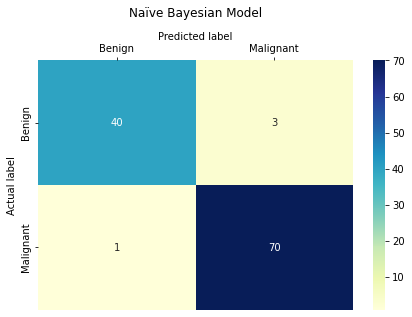

In [15]:
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.tight_layout()
plt.title(title, y=1.15);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

## Problem 2

### Setup

In [16]:
del x_train, x_test, y_train, y_test, scaler, classifier

In [17]:
x_df = cancer_df.copy()
y_df = x_df.pop('target')

features = x_df.columns.values

x = x_df.values
y = y_df.values

In [18]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(30,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [19]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x = scaler.fit_transform(x)

### Result function

In [20]:
def print_conf_matrix(confusion_matrix, conf_title, class_labels):
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")
    plt.tight_layout()
    plt.title(conf_title, y=1.15);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

### Train from decomposition  function

In [21]:
def train_from_decomp (x_decomp, y_decomp, pca_title):
    print("train_shape:" , x_decomp.shape)
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_decomp, y_decomp, test_size = 0.2, random_state=22)
    # print("x training size: ", x_train.shape)
    # print("y training size: ", y_train.shape)
    # print("x test size: ", x_test.shape)
    # print("y test size: ", y_test.shape)

    # --- TRAIN MODEL
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)

    # --- REPORT DATA
    y_pred = classifier.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=4, output_dict=False)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    print(report)
    print_conf_matrix(conf_matrix, pca_title, class_names)
    
    return metrics.classification_report(y_test, y_pred, digits=4, output_dict=True)

### Operation

Q2
shape (30, 1)
1 Component PCA (Q2)

PCA shape: (569, 1)


train_shape: (569, 1)
              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


---------------------------------------------------------------------------

2 Component PCA (Q2)

PCA shape: (569, 2)


train_shape: (569, 2)
              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


---------------------------------------------------------------------------

3 Component PCA (Q2)

PCA shape: (569, 3)

/tmp/ipykernel_80244/778940825.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



---------------------------------------------------------------------------

24 Component PCA (Q2)

PCA shape: (569, 24)


train_shape: (569, 24)
              precision    recall  f1-score   support

      Benign     0.9487    0.8605    0.9024        43
   Malignant     0.9200    0.9718    0.9452        71

    accuracy                         0.9298       114
   macro avg     0.9344    0.9161    0.9238       114
weighted avg     0.9308    0.9298    0.9291       114


---------------------------------------------------------------------------

25 Component PCA (Q2)

PCA shape: (569, 25)


train_shape: (569, 25)
              precision    recall  f1-score   support

      Benign     0.9487    0.8605    0.9024        43
   Malignant     0.9200    0.9718    0.9452        71

    accuracy                         0.9298       114
   macro avg     0.9344    0.9161    0.9238       114
weighted avg     0.9308    0.9298    0.9291       114


---------------------------------------------------

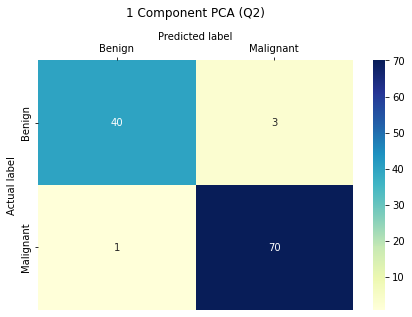

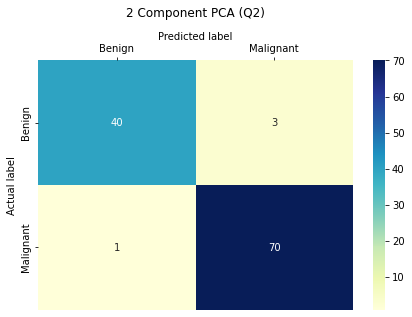

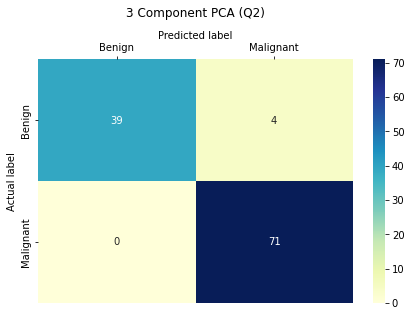

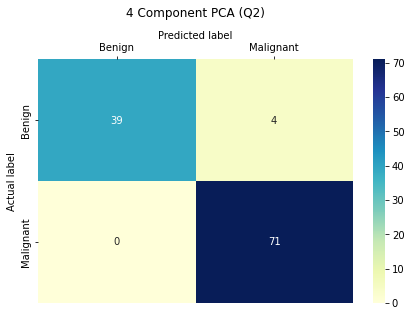

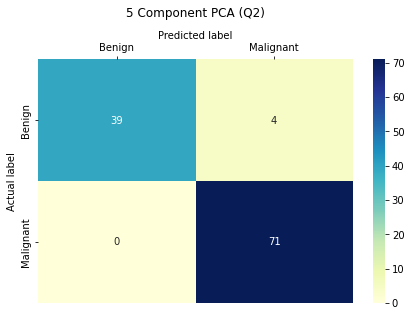

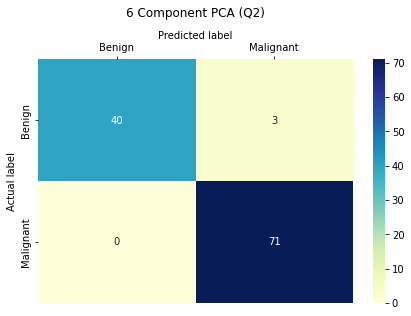

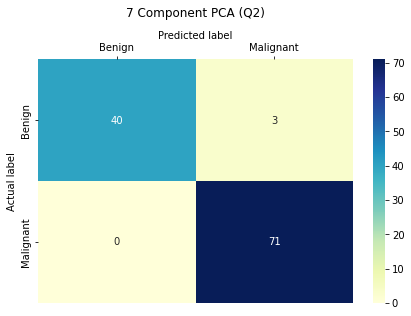

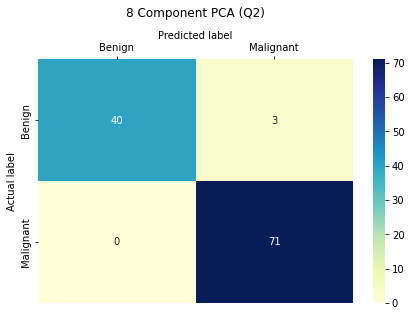

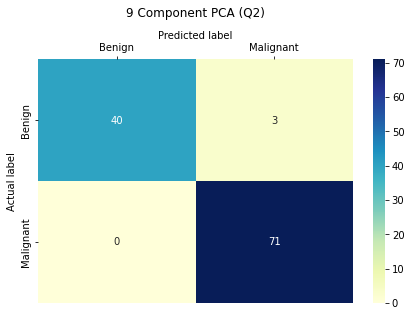

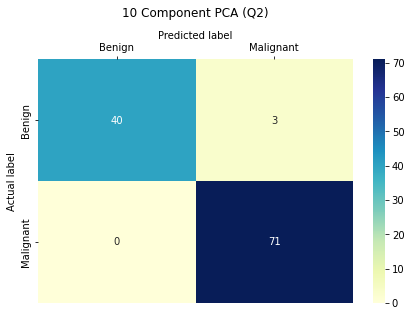

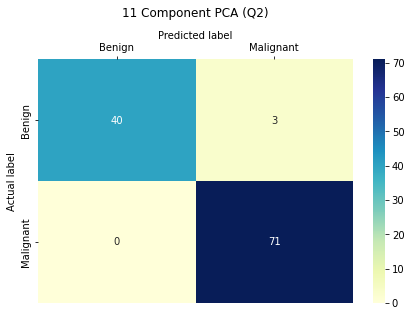

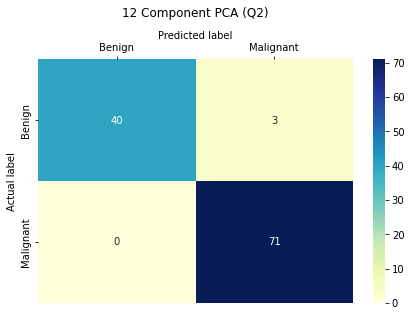

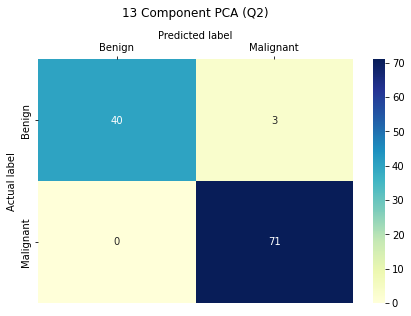

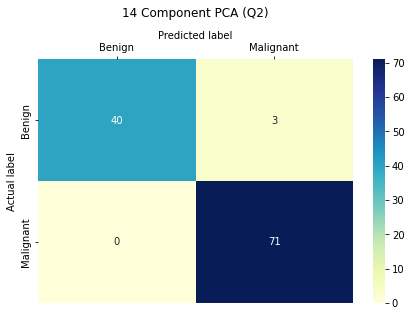

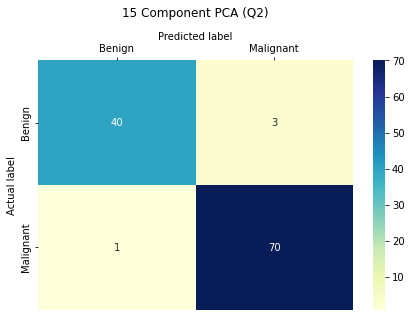

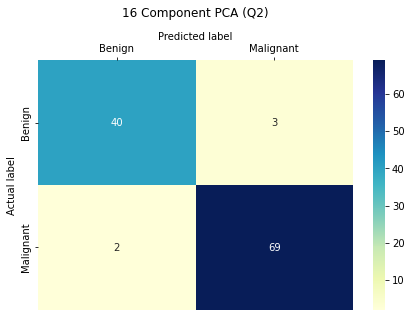

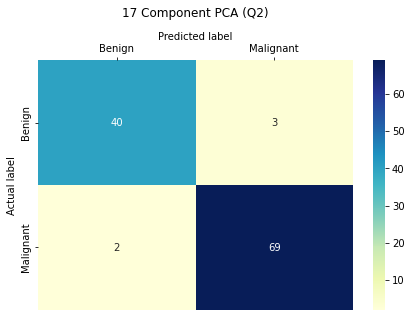

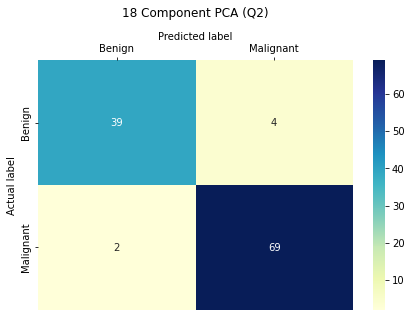

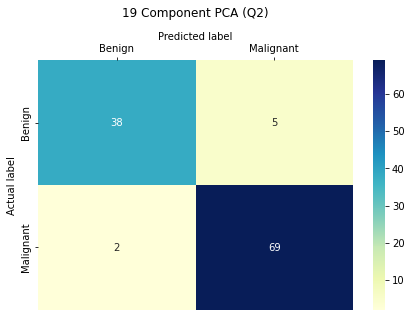

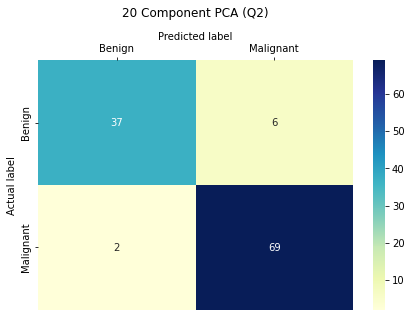

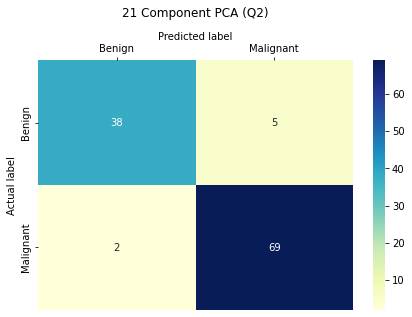

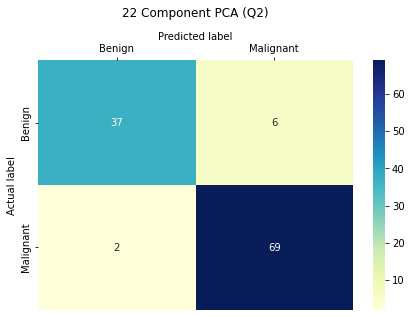

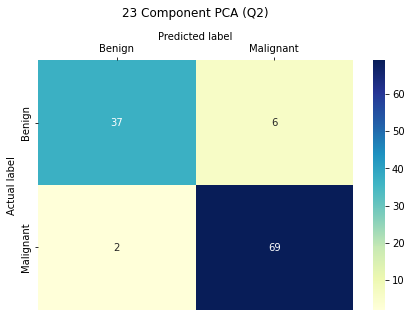

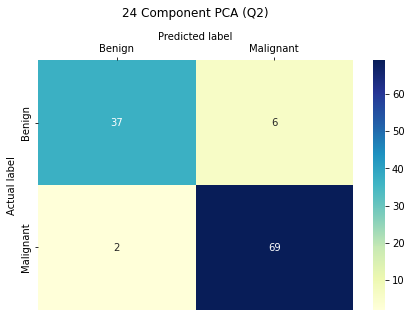

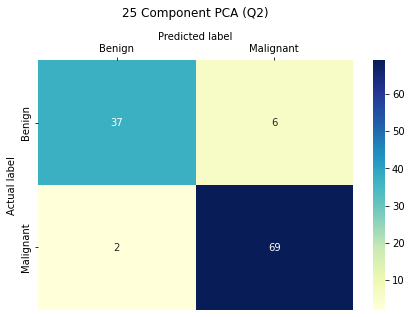

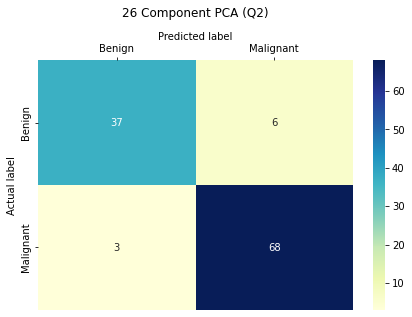

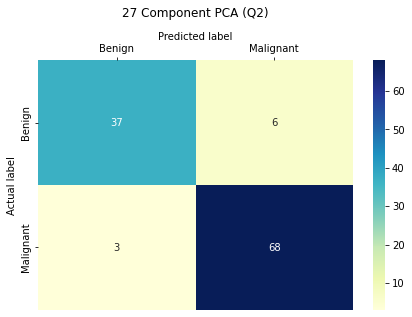

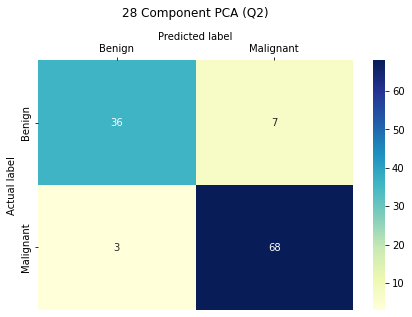

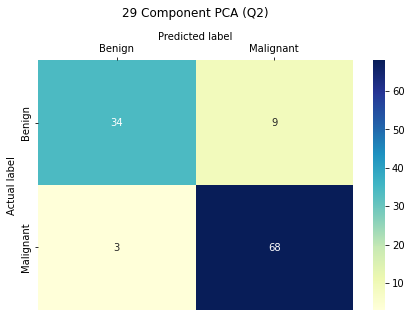

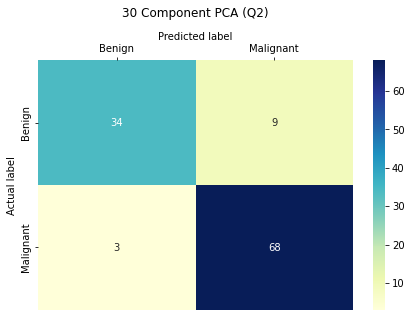

In [22]:
class_names=['Benign' , 'Malignant'] # name of classes
print("Q2")
accuracy_list = np.zeros((x.shape[1],1))
precision_list = np.zeros(accuracy_list.shape)
recall_list = np.zeros(accuracy_list.shape)
print('shape', (accuracy_list.shape))


for num_components in range(0, len(accuracy_list)):
    pca_title = str(num_components+1) + " Component PCA (Q2)"
    column_components = ['Component ' + str(item)   for item in range(1, num_components+2)]
    print(pca_title + '\n')
    
    # --- DECOMPOSE
    pca = PCA(n_components=num_components + 1)
    principalComponents = pca.fit_transform(x.copy())
    principal_df = pd.DataFrame(data = principalComponents, 
                            columns = column_components
                )
    print('PCA shape:' , principalComponents.shape)
    
    
    # --- DATA FRAME
    decomp_df = pd.concat([principal_df, y_df.copy()], axis = 1)
    # print(decomp_df) 
    print('\n')
    
    
    # --- CONVERT DATA FROM DATA FRAME 
    x_decomp = decomp_df
    y_decomp = x_decomp.pop('target')
    x_decomp = x_decomp.values
    y_decomp = y_decomp.values
    # print(x_decomp.shape)
    # print(y_decomp.shape)
    
    report = train_from_decomp(x_decomp, y_decomp, pca_title)
    accuracy_list[num_components] = report["accuracy"]
    precision_list[num_components] = (report["weighted avg"])['precision']
    recall_list[num_components] = (report["weighted avg"])['recall']
    
    print('\n' + '-'*75  +  '\n')

In [23]:
# print('accuracy:\n', accuracy_list)
# print('precision:\n', precision_list)
# print('recall:\n', recall_list)

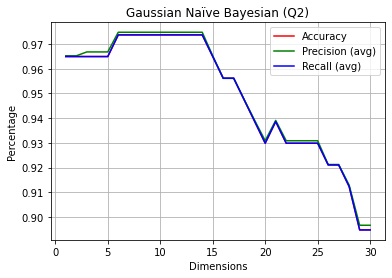

In [24]:
# print report_list stats
plt.figure(1)
plt.plot(range(1, len(accuracy_list)+1) , accuracy_list , color='r')
plt.plot(range(1, len(precision_list)+1) , precision_list , color='g')
plt.plot(range(1, len(recall_list)+1) , recall_list , color='b')
plt.grid() 
plt.xlabel('Dimensions') 
plt.ylabel('Percentage') 
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"])
plt.title("Gaussian Naïve Bayesian (Q2)") ;

## Problem 3

### Setup

In [25]:
del x_decomp, y_decomp, scaler

In [26]:
x_df = cancer_df.copy()
y_df = x_df.pop('target')

features = x_df.columns.values

x = x_df.values
y = y_df.values

In [27]:
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

print(f"{features.shape} with values of", features)

x shape: (569, 30)
y shape: (569,)
(30,) with values of ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
# scaler = MinMaxScaler()
scaler = StandardScaler()

x = scaler.fit_transform(x)

### Result function

In [29]:
def print_conf_matrix(confusion_matrix, conf_title, class_labels):
    fig, ax = plt.subplots()
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_labels, yticklabels=class_labels)
    ax.xaxis.set_label_position("top")
    ax.xaxis.set_ticks_position("top")
    plt.tight_layout()
    plt.title(conf_title, y=1.15);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

### Train from decomposition  function

In [30]:
def train_from_decomp (x_decomp_in, y_decomp_in, pca_title) :
    print("train_shape:" , x_decomp.shape)
    
    # --- SPLIT DATA
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_decomp_in, y_decomp_in, test_size = 0.2, random_state=22)
    # print("x training size: ", x_train.shape)
    # print("y training size: ", y_train.shape)
    # print("x test size: ", x_test.shape)
    # print("y test size: ", y_test.shape)

    # --- TRAIN MODEL
    classifier = LogisticRegression(max_iter=4000, C=0.5)
    classifier.fit(x_train, y_train)

    # --- PREDICT DATA AND REPORT
    y_pred = classifier.predict(x_test)
    report = metrics.classification_report(y_test, y_pred, digits=4)
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    print(report)
    print_conf_matrix(conf_matrix, pca_title, class_names)
    
    return metrics.classification_report(y_test, y_pred , output_dict=True)

### Operation

Q3
shape (30, 1)
1 Component PCA (Q3)

PCA shape: (569, 1)


train_shape: (569, 1)
              precision    recall  f1-score   support

      Benign     0.9756    0.9302    0.9524        43
   Malignant     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114


---------------------------------------------------------------------------

2 Component PCA (Q3)

PCA shape: (569, 2)


train_shape: (569, 2)
              precision    recall  f1-score   support

      Benign     0.9487    0.8605    0.9024        43
   Malignant     0.9200    0.9718    0.9452        71

    accuracy                         0.9298       114
   macro avg     0.9344    0.9161    0.9238       114
weighted avg     0.9308    0.9298    0.9291       114


---------------------------------------------------------------------------

3 Component PCA (Q3)

PCA shape: (569, 3)

/tmp/ipykernel_80244/778940825.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



---------------------------------------------------------------------------

24 Component PCA (Q3)

PCA shape: (569, 24)


train_shape: (569, 24)
              precision    recall  f1-score   support

      Benign     1.0000    0.9302    0.9639        43
   Malignant     0.9595    1.0000    0.9793        71

    accuracy                         0.9737       114
   macro avg     0.9797    0.9651    0.9716       114
weighted avg     0.9748    0.9737    0.9735       114


---------------------------------------------------------------------------

25 Component PCA (Q3)

PCA shape: (569, 25)


train_shape: (569, 25)
              precision    recall  f1-score   support

      Benign     1.0000    0.9302    0.9639        43
   Malignant     0.9595    1.0000    0.9793        71

    accuracy                         0.9737       114
   macro avg     0.9797    0.9651    0.9716       114
weighted avg     0.9748    0.9737    0.9735       114


---------------------------------------------------

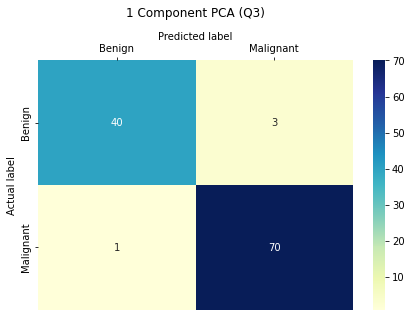

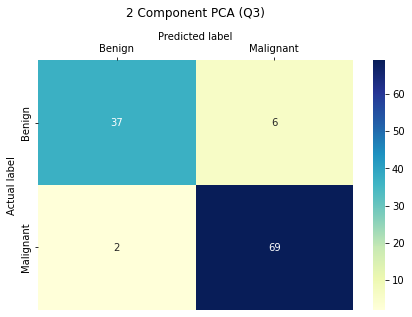

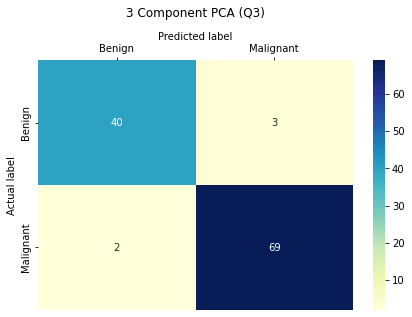

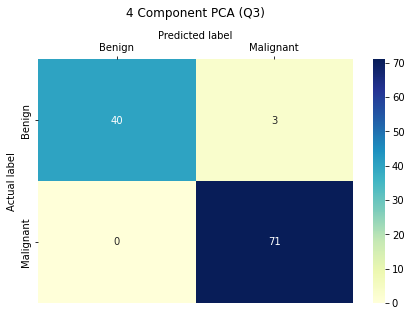

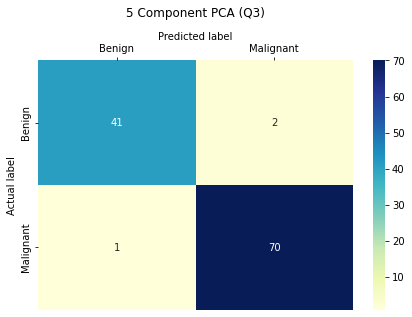

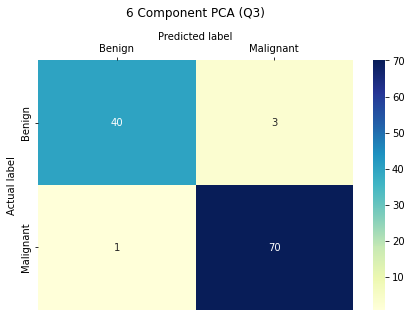

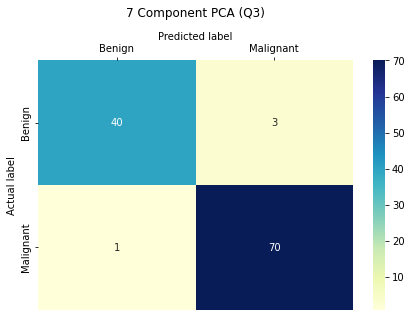

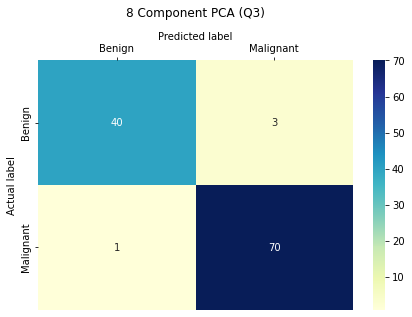

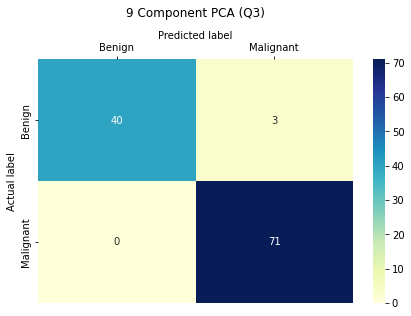

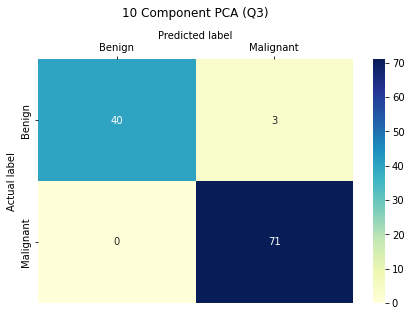

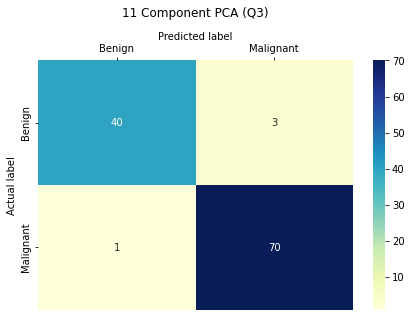

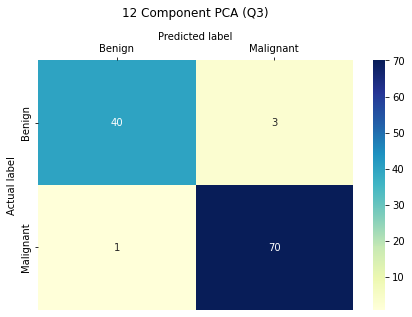

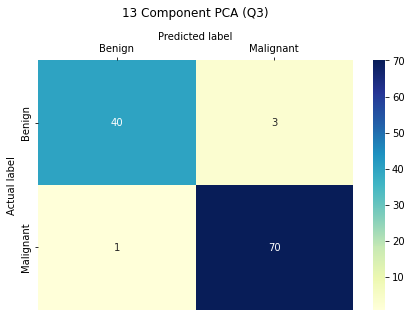

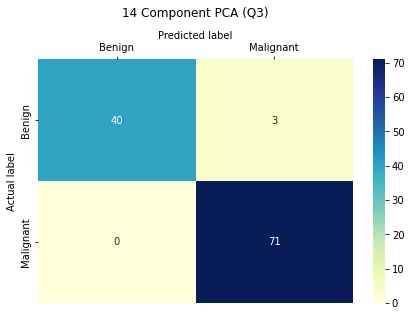

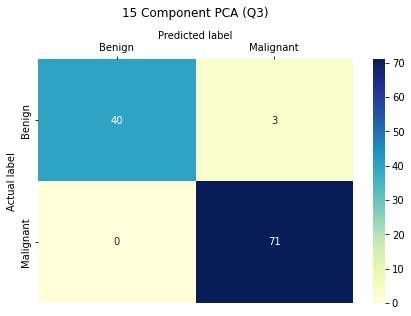

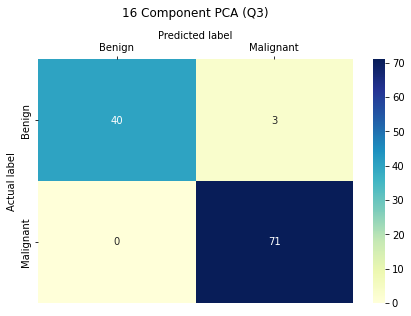

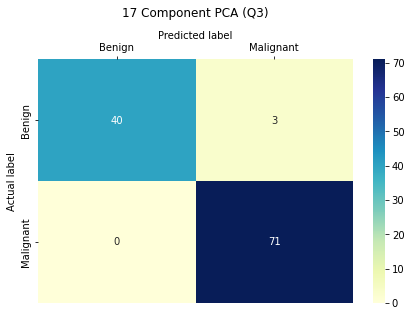

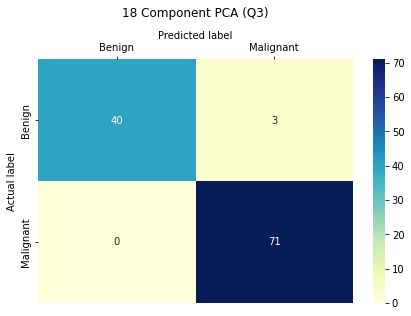

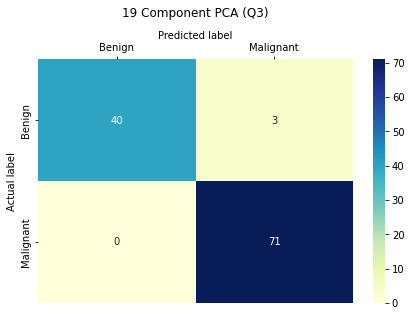

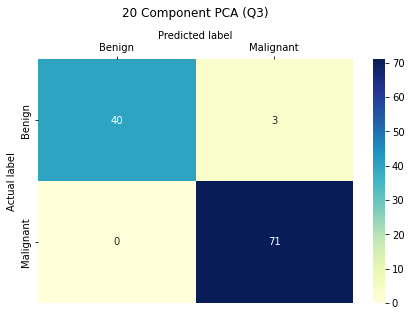

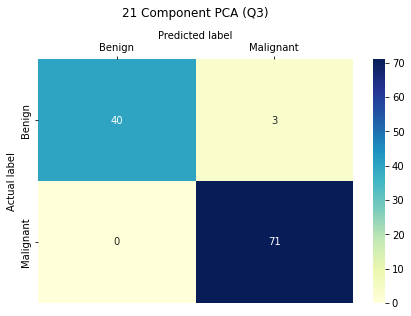

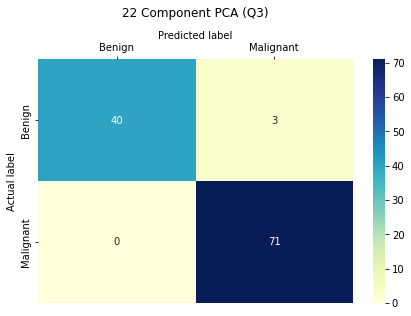

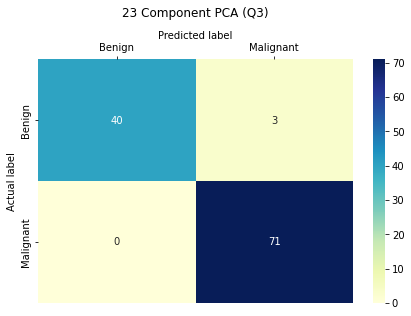

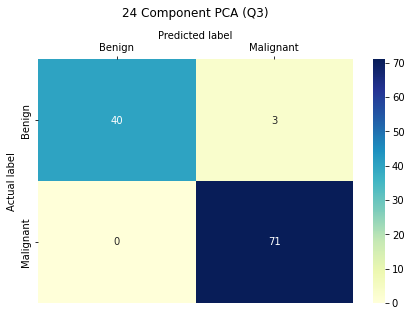

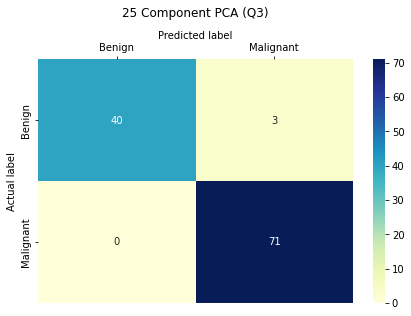

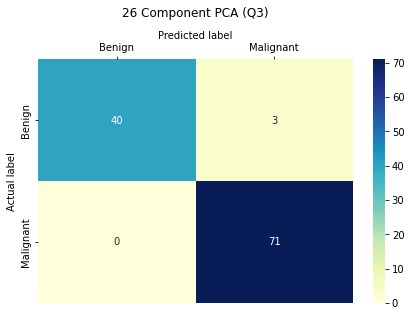

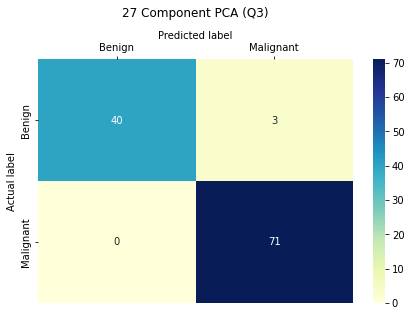

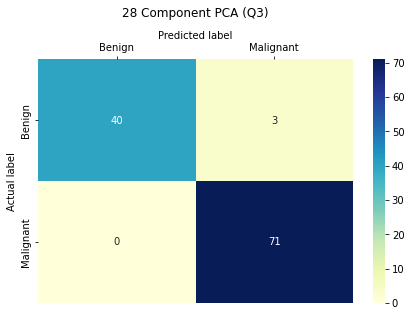

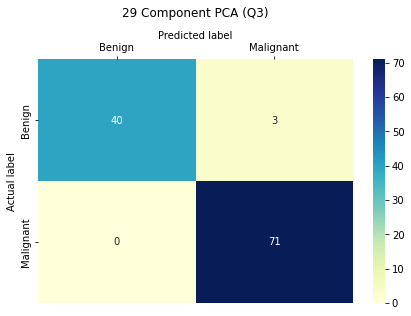

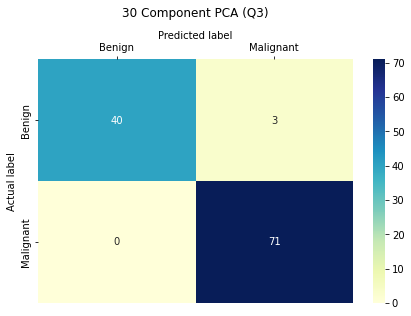

In [31]:
class_names=['Benign' , 'Malignant'] # name of classes
print("Q3")
accuracy_list = np.zeros((x.shape[1],1))
precision_list = np.zeros(accuracy_list.shape)
recall_list = np.zeros(accuracy_list.shape)
print('shape', (accuracy_list.shape))


for num_components in range(0, len(accuracy_list)):
    pca_title = str(num_components+1) + " Component PCA (Q3)"
    column_components = ['Component ' + str(item)   for item in range(1, num_components+2)]
    print(pca_title + '\n')
    
    # --- DECOMPOSE
    pca = PCA(n_components=num_components + 1)
    principalComponents = pca.fit_transform(x.copy())
    principal_df = pd.DataFrame(data = principalComponents, 
                            columns = column_components
                )
    print('PCA shape:' , principalComponents.shape)
    
    
    # --- DATA FRAME
    decomp_df = pd.concat([principal_df, y_df.copy()], axis = 1)
    # print(decomp_df) 
    print('\n')
    
    
    # --- CONVERT DATA FROM DATA FRAME 
    x_decomp = decomp_df
    y_decomp = x_decomp.pop('target')
    x_decomp = x_decomp.values
    y_decomp = y_decomp.values
    # print(x_decomp.shape)
    # print(y_decomp.shape)
    
    report = train_from_decomp(x_decomp, y_decomp, pca_title)
    accuracy_list[num_components] = report["accuracy"]
    precision_list[num_components] = (report["weighted avg"])['precision']
    recall_list[num_components] = (report["weighted avg"])['recall']
    
    print('\n' + '-'*75  +  '\n')

In [32]:
# print('accuracy:\n', accuracy_list)
# print('precision:\n', precision_list)
# print('recall:\n', recall_list)

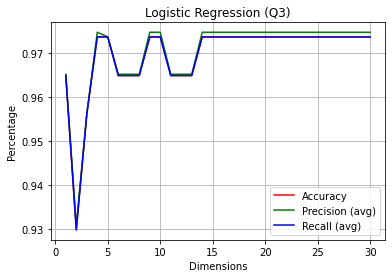

In [33]:
# print report_list stats
plt.figure(2)
plt.plot(range(1, len(accuracy_list)+1) , accuracy_list , color='r')
plt.plot(range(1, len(precision_list)+1) , precision_list , color='g')
plt.plot(range(1, len(recall_list)+1) , recall_list , color='b')
plt.grid() 
plt.xlabel('Dimensions') 
plt.ylabel('Percentage') 
plt.legend(["Accuracy", "Precision (avg)", "Recall (avg)"])
plt.title("Logistic Regression (Q3)") ;